In [42]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression - Train on One Country, Test on Another

In [64]:
path = os.getcwd() + "/clean_data/processed_country_temperature_data.csv"
df = pd.read_csv(path)
df.head(50)

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1850-01-01,24.563,Mozambique
2,1824-01-01,24.771,Guadeloupe
3,1819-05-01,31.917,Niger
4,1823-01-01,-29.446,Denmark
5,1758-03-01,22.216,Bahamas
6,1791-05-01,26.422,Libya
7,1743-11-01,10.692,Guernsey
8,1808-10-01,21.590,Israel
9,1743-11-01,5.645,Montenegro


In [65]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  beta = tf.linalg.solve(tf.matmul(tf.transpose(X), X), tf.matmul(tf.transpose(X), Y))  # Return closed form solution (use tf.transpose and tf.mathmul instead of np version)
  return beta

In [66]:
def linear_reg_and_plot(df, train_country, test_country, input, output):
    train_data = df[df['Country'] == train_country]
    test_data = df[df['Country'] == test_country]

    if train_data.empty or test_data.empty:
        print(f"No data available for training ({train_country}) or testing ({test_country}).")
    else:
        # Training and training plot
        # Convert to column vectors
        X_train = train_data[input].values.reshape(-1, 1)  
        Y_train = train_data[output].values.reshape(-1, 1)  
        X_test = test_data[input].values.reshape(-1, 1)  
        Y_test = test_data[output].values.reshape(-1, 1)  

        # Generate linear coefficients on training data (with intercept)
        X_train_with_intercept = tf.concat([X_train, tf.ones([tf.shape(X_train)[0], 1])], axis=1)# Append a dummy feature of ones that is N x 1 (increase dimensionality to 2)
        beta_train_linear = linear_coefs(X_train_with_intercept, Y_train) # Run linear regression on X (including intercept) and outputs Y
        Y_train_prediction = tf.matmul(X_train_with_intercept, beta_train_linear)  # Multiply original inputs X by found features (dot product of input X with parameters produces output Y - beta[0] is slope and beta[1] is intercept)

        # Use calculated linear coefficients on training data
        X_test_with_intercept = tf.concat([X_test, tf.ones([tf.shape(X_test)[0], 1])], axis=1)# Append a dummy feature of ones that is N x 1 (increase dimensionality to 2)
        Y_test_prediction = tf.matmul(X_test_with_intercept, beta_train_linear)

        # Plot for training data
        plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue")
        plt.plot(X_train, Y_train_prediction, label="Training Fit", color="red")

        plt.ylabel(f"Output: {output}")
        plt.xlabel(f"Input: {input}")
        plt.title(f"Regression Model for {train_country} (Training Data)")
        plt.legend()
        plt.show()

        # Evaluate accuracy of predictions on the training data
        mae_train = mean_absolute_error(Y_train, Y_train_prediction.numpy())
        print(f"Mean Absolute Error (in Celcius): {mae_train}")

        # Evaluate coefficient of determination
        r2_train = r2_score(Y_train, Y_train_prediction.numpy())
        print(f"Coefficient of Determination (r^2): {r2_train}")

        # Testing plot
        # Plot for test data
        plt.scatter(X_test, Y_test, label=f"Test Data ({test_country})", color="blue")
        plt.plot(X_test, Y_test_prediction, label="Test Fit", color="red")

        plt.ylabel(f"Output: {output}")
        plt.xlabel(f"Input: {input}")
        plt.title(f"Regression Model for {test_country} (Training Data)")
        plt.legend()
        plt.show()

        # Evaluate accuracy of predictions on the test data
        mae_test = mean_absolute_error(Y_test, Y_test_prediction.numpy())
        print(f"Mean Absolute Error (in Celcius): {mae_test}")

        # Evaluate coefficient of determination
        r2_test = r2_score(Y_test, Y_test_prediction.numpy())
        print(f"Coefficient of Determination (r^2): {r2_test}")

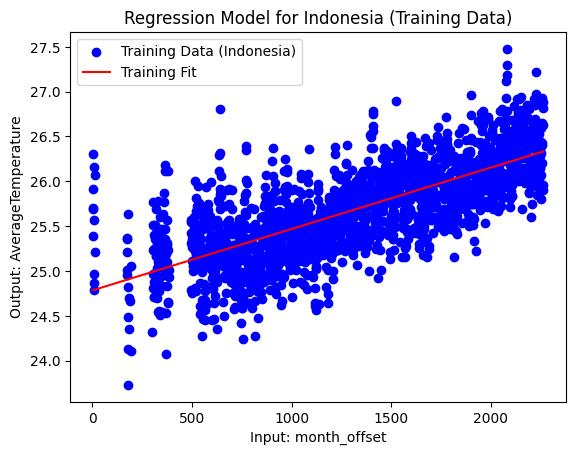

Mean Absolute Error (in Celcius): 0.27217671800484483
Coefficient of Determination (r^2): 0.5434180663305574


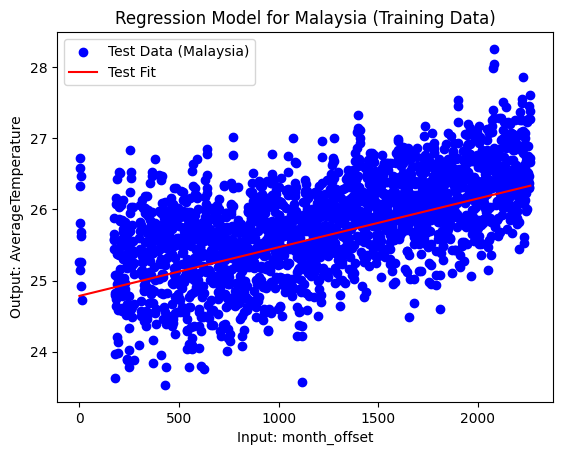

Mean Absolute Error (in Celcius): 0.46900253634982647
Coefficient of Determination (r^2): 0.27841634183205477


In [71]:
# Compute the month offset (monotonically increasing) from the first date
df['dt'] = pd.to_datetime(df['dt'])
df['month_offset'] = (
    (df['dt'].dt.year - df.groupby('Country')['dt'].transform('min').dt.year) * 12
    + (df['dt'].dt.month - df.groupby('Country')['dt'].transform('min').dt.month)
    + 1)

df_month = df[['month_offset', 'AverageTemperature', 'Country']]
df_month = df_month.groupby(['Country', 'month_offset']).mean() 
df_month = df_month.reset_index(drop=False)

train_country = "Indonesia" # Country to train the model
test_country = "Malaysia" # Country to test the model
linear_reg_and_plot(df, train_country=train_country, test_country=test_country, input="month_offset", output="AverageTemperature")

# Linear Regression - Aggregate Over Year

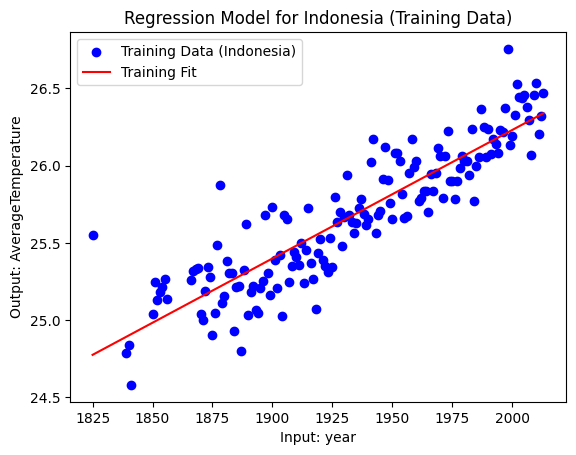

Mean Absolute Error (in Celcius): 0.155986785961374
Coefficient of Determination (r^2): 0.7982970766742589


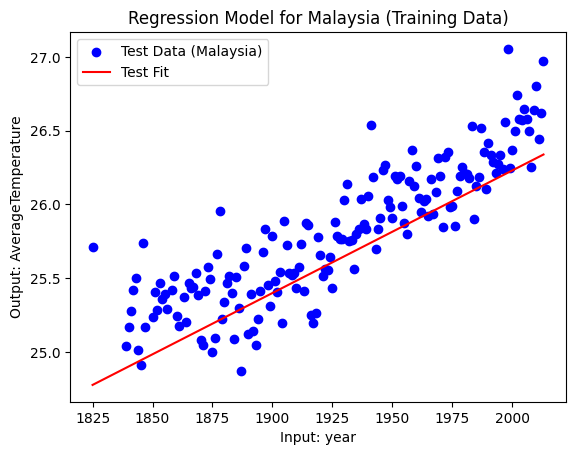

Mean Absolute Error (in Celcius): 0.23358145380501838
Coefficient of Determination (r^2): 0.6095961286791616


In [73]:
df['year'] = pd.to_datetime(df['dt']).dt.year

# May be influenced by not every month having a measurement
df_year = df[['year', 'AverageTemperature', 'Country']]
df_year = df_year.groupby(['Country', 'year']).mean() 
df_year = df_year.reset_index(drop=False)

train_country = "Indonesia" # Country to train the model
test_country = "Malaysia" # Country to test the model
linear_reg_and_plot(df_year, train_country=train_country, test_country=test_country, input="year", output="AverageTemperature")